## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
combine_df=pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combine_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Observations:
# Based on the 2 bar plots, the drug regimens Capumolin and Ramicane have the highest drug counts
# The mean and median of the drug regimens also have similar numbers, that is mean and variance of Capumolin at 40.675741 and 24.947764,and Ramicane at 40.216745 and 23.486704. The variability for both of these are also very low indicating less dispersion and closest to the mean, compared to the other drug regimens. 
#Capumolin has an interquartile range of 7.78, the lowest amongst the 4 drug regimens, indicating that there is less spread in this variable.

In [2]:
# Checking the number of mice.
mouse_count=combine_df["Mouse ID"].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice_row=combine_df[combine_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicatemice_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicatemice_row=combine_df[combine_df.duplicated(['Mouse ID'])]
all_duplicatemice_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmouseid_df=combine_df.drop_duplicates("Mouse ID")
cleanmouseid_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
newmouse_count=cleanmouseid_df["Mouse ID"].count()
newmouse_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean=combine_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=combine_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance=combine_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv=combine_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem=combine_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_tumorvol_df=pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_tumorvol_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#The following were attempts for code but not successful since error code occured
#1-combined_df.groupby(['Drug Regimen']), as_index=False.aggregate(mean_Tumor=('Tumor Volume' ,np.mean), median_Tumor=('Tumor Volume', np.median), variance_Tumor=('Tumor Volume', np.var), standard_Tumor=('Tumor Volume', np.var))
#2-summary_tumorvol_df.aggregate(['mean', 'median', 'var', 'std', 'sem'], columns=['Drug Regimen'])
#3-summary_tumorvol_agg=cleanmouseid_df.groupby(['Drug Regimen'])[["Tumor Volume(mm3)"]].agg(['mean','median','var','std','sem'])
#(print for 3)-summary_tumorvol_agg

aggdata_data= summary_tumorvol_df.agg((['mean', 'median', 'var', 'std', 'sem']), column=['Drug Regimen'])  
aggdata_data

,Mean,Median,Variance,Standard Deviation,SEM
mean,50.976144,49.942960,47.708346,6.809671,0.499641
median,53.060651,51.819532,45.831020,6.766916,0.514641
var,31.599380,22.206987,257.831210,1.485251,0.010515
std,5.621333,4.712429,16.057123,1.218709,0.102544
sem,1.777621,1.490201,5.077708,0.385390,0.032427


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugregi_data=pd.DataFrame(combine_df.groupby(["Drug Regimen"]).count()).reset_index()

drugregi_df=drugregi_data[["Drug Regimen", "Timepoint", "Mouse ID"]]
drugregi_df=drugregi_df.set_index("Drug Regimen")
drugregi_df

,Timepoint,Mouse ID
Drug Regimen,,
Capomulin,230,230
Ceftamin,178,178
Infubinol,178,178
Ketapril,188,188
Naftisol,186,186
Placebo,181,181
Propriva,161,161
Ramicane,228,228
Stelasyn,181,181


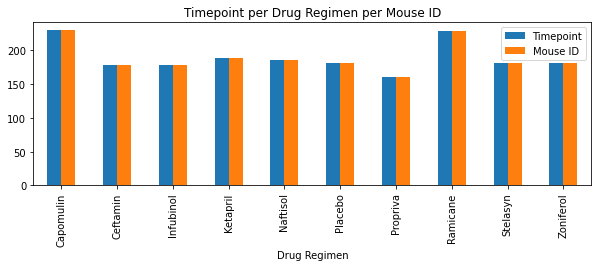

<Figure size 432x288 with 0 Axes>

In [10]:
#Pandas bar plot based on prior table
drugregi_df.plot(kind="bar", figsize=(10,3))

plt.title("Timepoint per Drug Regimen per Mouse ID")
plt.show()
plt.tight_layout()


In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugregi_list=summary_tumorvol_df.index.tolist()
drugregi_list


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [12]:
#Create data for y axis
drug_count=(combine_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [13]:
#Create data for x axis
x_axis=np.arange(len(drug_count))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0, 0.5, 'Drug Count')

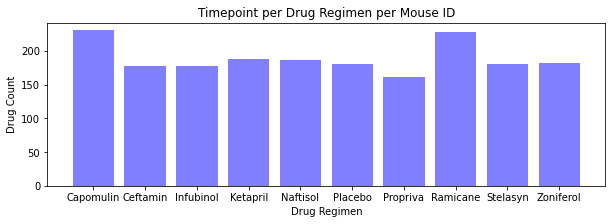

In [14]:
#Create bar plot using pyplot using above data
x_axis=drugregi_list

plt.figure(figsize=(10,3))
plt.bar(x_axis, drug_count, color='b', alpha=0.5, align="center")

plt.title("Timepoint per Drug Regimen per Mouse ID")
plt.xlabel("Drug Regimen")
plt.ylabel("Drug Count")

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mousegender_df=pd.DataFrame(combine_df.groupby(["Sex"]).count()).reset_index()
mousegender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [16]:
#Create two a new table with only two columns
#mousegender_df=mousegender_df.set_index("Sex")

mousegender_df=mousegender_df[["Sex", "Mouse ID"]]
mousegender_df


,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

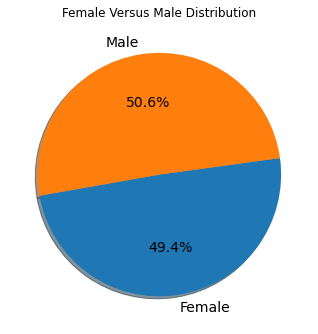

In [17]:
#Pandas pie plot based on prior data

plt.figure(figsize=(12,6))
ax1=plt.subplot(121, aspect="equal")
mousegender_df.plot(kind="pie", y="Mouse ID", ax=ax1, autopct='%1.1f%%', startangle=190, shadow=True, labels=mousegender_df["Sex"], legend=False, fontsize=14) 

plt.title("Female Versus Male Distribution")
plt.xlabel("")
plt.ylabel("")

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Get total count for male and female in the distribution

mousegender_count=(combine_df.groupby(["Sex"])["Age_months"].count()).tolist()
mousegender_count


[935, 958]

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

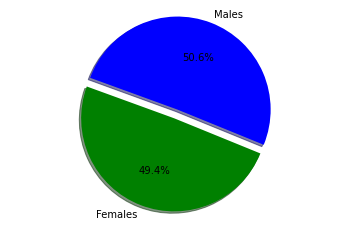

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Creating pie plot by adding customization

labels=["Females","Males"]
colors=["green","blue"]
explode=(0.1,0)

plt.pie(mousegender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin will be completed separately

# Calculations for Capomulin
Capomulin_df = cleanmouseid_df.loc[cleanmouseid_df["Drug Regimen"] == "Capomulin",:]
Capomulin_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
60,f966,Capomulin,Male,16,17,0,45.0,0
95,u364,Capomulin,Male,18,17,0,45.0,0


In [21]:
# Start by getting the last (greatest) timepoint for each mouse

Capomulin_max = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_max)
Capomulin_merge = pd.merge(Capomulin_vol, cleanmouseid_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head


<bound method NDFrame.head of    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      b128          0    Capomulin  Female           9          22   
1      b742          0    Capomulin    Male           7          21   
2      f966          0    Capomulin    Male          16          17   
3      g288          0    Capomulin    Male           3          19   
4      g316          0    Capomulin  Female          22          22   
5      i557          0    Capomulin  Female           1          24   
6      i738          0    Capomulin  Female          23          20   
7      j119          0    Capomulin  Female           7          23   
8      j246          0    Capomulin  Female          21          21   
9      l509          0    Capomulin    Male          17          21   
10     l897          0    Capomulin    Male          17          19   
11     m601          0    Capomulin    Male          22          17   
12     m957          0    Capomulin  Female    

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Ramicane_df = cleanmouseid_df.loc[cleanmouseid_df["Drug Regimen"] == "Ramicane",:]
Ramicane_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
50,s508,Ramicane,Male,1,17,0,45.0,0
65,m546,Ramicane,Male,18,16,0,45.0,0
75,z578,Ramicane,Male,11,16,0,45.0,0


In [23]:
# Start by getting the last (greatest) timepoint for each mouse

Ramicane_max = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_max)
Ramicane_merge = pd.merge(Ramicane_vol, cleanmouseid_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,0,Ramicane,Male,3,22,45.0,0
1,a444,0,Ramicane,Female,10,25,45.0,0
2,a520,0,Ramicane,Male,13,21,45.0,0
3,a644,0,Ramicane,Female,7,17,45.0,0
4,c458,0,Ramicane,Female,23,20,45.0,0


In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Infubinol_df = cleanmouseid_df.loc[cleanmouseid_df["Drug Regimen"] == "Infubinol",:]
Infubinol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.0,0
464,a251,Infubinol,Female,21,25,0,45.0,0
524,a577,Infubinol,Female,6,25,0,45.0,0
531,a685,Infubinol,Male,8,30,0,45.0,0
628,c139,Infubinol,Male,11,28,0,45.0,0


In [25]:
# Start by getting the last (greatest) timepoint for each mouse

Infubinol_max = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_max)
Infubinol_merge = pd.merge(Infubinol_vol, cleanmouseid_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,0,Infubinol,Female,20,23,45.0,0
1,a251,0,Infubinol,Female,21,25,45.0,0
2,a577,0,Infubinol,Female,6,25,45.0,0
3,a685,0,Infubinol,Male,8,30,45.0,0
4,c139,0,Infubinol,Male,11,28,45.0,0


In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Ceftamin_df = cleanmouseid_df.loc[cleanmouseid_df["Drug Regimen"] == "Ceftamin",:]
Ceftamin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.0,0
594,b447,Ceftamin,Male,2,30,0,45.0,0
595,b487,Ceftamin,Female,6,28,0,45.0,0
611,b759,Ceftamin,Female,12,25,0,45.0,0
837,f436,Ceftamin,Female,3,25,0,45.0,0


In [27]:
# Start by getting the last (greatest) timepoint for each mouse

Ceftamin_max = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_max)
Ceftamin_merge = pd.merge(Ceftamin_vol, cleanmouseid_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,0,Ceftamin,Female,20,28,45.0,0
1,b447,0,Ceftamin,Male,2,30,45.0,0
2,b487,0,Ceftamin,Female,6,28,45.0,0
3,b759,0,Ceftamin,Female,12,25,45.0,0
4,f436,0,Ceftamin,Female,3,25,45.0,0


In [28]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

experidrug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combine_df[combine_df["Drug Regimen"].isin(experidrug_list)]
drugs.head

<bound method NDFrame.head of      Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
1        k403     Ramicane    Male          21          16          5   
2        k403     Ramicane    Male          21          16         10   
3        k403     Ramicane    Male          21          16         15   
4        k403     Ramicane    Male          21          16         20   
...       ...          ...     ...         ...         ...        ...   
1868     z581    Infubinol  Female          24          25         25   
1869     z581    Infubinol  Female          24          25         30   
1870     z581    Infubinol  Female          24          25         35   
1871     z581    Infubinol  Female          24          25         40   
1872     z581    Infubinol  Female          24          25         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1  

In [29]:
experidrug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in experidrug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
    
treatment = 0
for drug in experidrug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    interqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*interqr),2)
    upper_bound = round(upperq + (1.5*interqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {interqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1
    

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

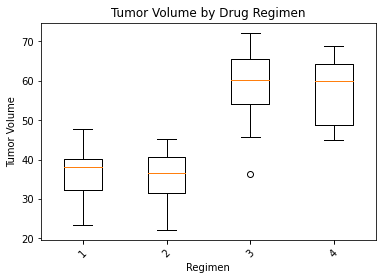

In [32]:
boxplot_list = []
for drug in experidrug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], experidrug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

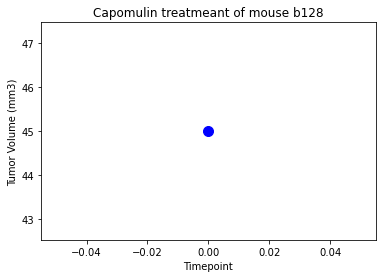

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

b128mouse_df = Capomulin_merge.loc[Capomulin_merge["Mouse ID"] == "b128",:]
b128mouse_df.head()
x_axis = b128mouse_df["Timepoint"]
tumsiz = b128mouse_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axis, tumsiz,linewidth=1, markersize=10,marker="o",color="blue")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

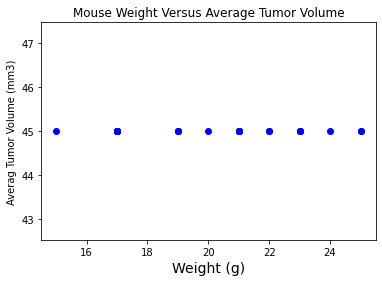

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_merge.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])


The r-squared is: 0.0


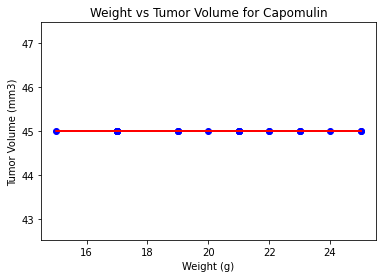

In [39]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()